In [7]:
import yfinance as yf
import pandas as pd



# Create a ticker object for Tesla
tesla = yf.Ticker("TSLA")

# Extract stock data and save it in a dataframe
tesla_data = tesla.history(period="max")

# Reset the index
tesla_data.reset_index(inplace=True)

# Display the first five rows
print(tesla_data.head())


                       Date      Open      High       Low     Close     Volume  Dividends  Stock Splits
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667  281494500        0.0           0.0
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667  257806500        0.0           0.0
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000  123282000        0.0           0.0
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   77097000        0.0           0.0
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000  103003500        0.0           0.0


In [21]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from io import StringIO  # Import StringIO to handle HTML parsing correctly

# Define the URL for Tesla's financial data on MacroTrends
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Set headers to mimic a browser request
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36"
}

# Send a request with headers
response = requests.get(url, headers=headers)

# Parse the webpage content
soup = BeautifulSoup(response.text, "html.parser")

# Find the correct table by searching for the keyword "Quarterly Revenue"
tables = soup.find_all("table")

# Extract the revenue table
for table in tables:
    if "Quarterly Revenue" in str(table):
        tesla_revenue = pd.read_html(StringIO(str(table)))[0]  # Use StringIO to avoid the warning
        break

# Rename columns
tesla_revenue.columns = ["Date", "Revenue"]

# Clean data (remove "$" and "," then convert to float)
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].replace(r"[$,]", "", regex=True)
tesla_revenue.dropna(inplace=True)
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].astype(float)

# Display the last five rows
print(tesla_revenue.tail())


          Date  Revenue
57  2010-09-30     31.0
58  2010-06-30     28.0
59  2010-03-31     21.0
61  2009-09-30     46.0
62  2009-06-30     27.0


In [25]:
import yfinance as yf

# Create a ticker object for GameStop (GME)
gme = yf.Ticker("GME")

# Extract historical stock data and save it in a DataFrame
gme_data = gme.history(period="max")

# Reset the index
gme_data.reset_index(inplace=True)

# Display the first five rows
print(gme_data.head())


                       Date      Open      High       Low     Close    Volume  Dividends  Stock Splits
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691667  76216000        0.0           0.0
1 2002-02-14 00:00:00-05:00  1.712707  1.716073  1.670625  1.683250  11021600        0.0           0.0
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600        0.0           0.0
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400        0.0           0.0
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800        0.0           0.0


In [27]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# Define the URL for GameStop's revenue data on Macrotrends
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

# Send an HTTP request and fetch the webpage content
response = requests.get(url, headers={"User-Agent": "Mozilla/5.0"})
soup = BeautifulSoup(response.text, "html.parser")

# Extract all tables from the webpage
tables = pd.read_html(response.text)

# Find the correct table (MacroTrends usually stores revenue data in the second table)
gme_revenue = tables[1]  # This may change, so verify the correct index

# Rename columns
gme_revenue.columns = ["Date", "Revenue"]

# Clean the Revenue column by removing $ and commas
gme_revenue["Revenue"] = gme_revenue["Revenue"].replace({"\$": "", ",": ""}, regex=True)

# Drop null values
gme_revenue.dropna(inplace=True)

# Display the last five rows
print(gme_revenue.tail())


<>:22: SyntaxWarning: invalid escape sequence '\$'
<>:22: SyntaxWarning: invalid escape sequence '\$'
C:\Users\kambo\AppData\Local\Temp\ipykernel_6400\1807025251.py:22: SyntaxWarning: invalid escape sequence '\$'
  gme_revenue["Revenue"] = gme_revenue["Revenue"].replace({"\$": "", ",": ""}, regex=True)


          Date Revenue
59  2010-01-31    3524
60  2009-10-31    1835
61  2009-07-31    1739
62  2009-04-30    1981
63  2009-01-31    3492


C:\Users\kambo\AppData\Local\Temp\ipykernel_6400\1807025251.py:13: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(response.text)


In [29]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# Define the URL for GameStop's revenue data on Macrotrends
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

# Send an HTTP request with a user-agent to prevent blocking
response = requests.get(url, headers={"User-Agent": "Mozilla/5.0"})
soup = BeautifulSoup(response.text, "html.parser")

# Extract all tables from the webpage
tables = pd.read_html(response.text)

# Find the correct table (MacroTrends usually stores revenue data in the second table)
gme_revenue = tables[1]  # Verify the correct index if needed

# Rename columns
gme_revenue.columns = ["Date", "Revenue"]

# Clean the Revenue column by removing $ and commas
gme_revenue["Revenue"] = gme_revenue["Revenue"].replace({r"\$": "", ",": ""}, regex=True)

# Drop null values
gme_revenue.dropna(inplace=True)

# Display the last five rows
print(gme_revenue.tail())


          Date Revenue
59  2010-01-31    3524
60  2009-10-31    1835
61  2009-07-31    1739
62  2009-04-30    1981
63  2009-01-31    3492


C:\Users\kambo\AppData\Local\Temp\ipykernel_6400\4074956052.py:13: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(response.text)


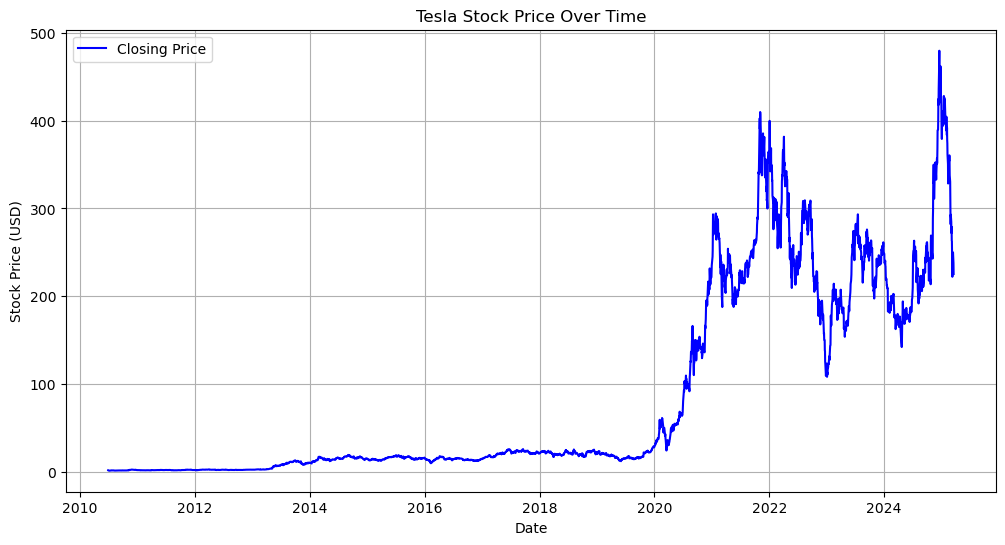

In [31]:
import yfinance as yf
import matplotlib.pyplot as plt

# Download Tesla stock data
tesla_data = yf.Ticker("TSLA").history(period="max")

# Reset index to make Date a column
tesla_data.reset_index(inplace=True)

# Define the function to create the stock graph
def make_graph(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data["Date"], data["Close"], label="Closing Price", color="blue")
    plt.xlabel("Date")
    plt.ylabel("Stock Price (USD)")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the function to plot Tesla stock data
make_graph(tesla_data, "Tesla Stock Price Over Time")


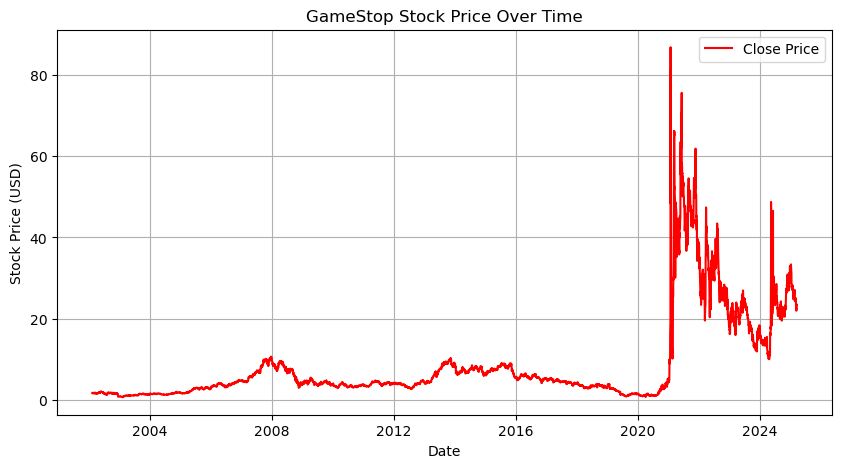

In [33]:
import yfinance as yf
import matplotlib.pyplot as plt

# Download GameStop stock data from Yahoo Finance
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

# Reset index
gme_data.reset_index(inplace=True)

# Function to plot stock data
def make_graph(stock_data, title):
    plt.figure(figsize=(10, 5))
    plt.plot(stock_data["Date"], stock_data["Close"], label="Close Price", color="red")
    plt.xlabel("Date")
    plt.ylabel("Stock Price (USD)")
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

# Plot GameStop stock data
make_graph(gme_data, "GameStop Stock Price Over Time")
